## 2.1 Template Matching 
<br>

## Introduction

In this warm-up section, we will address the problem of detection and recognition using Template Matching (http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html). 

Template matching is a 'brute-force' algorithm for object recognition. The most basic method of template matching is to directly compare the grayscale images, without using edge detection. For example, if you were trying to detect, let's say a football, you will need to create a base template of the object. During the operation, the template matching algorithm would analyze the current image to find areas which are similar to the template. This basic approach is quite limited. For one thing, it is not robust to inconsistent changes in brightness within the image. If the template image has strong features, a feature-based approach may be considered; the approach may prove further useful if the match in the search image might be transformed in some fashion. For templates without strong features, or for when the bulk of the template image constitutes the matching image, a template-based approach may be effective. 

In the naive approach, the difference between the template and the matching area is computed pixel by pixel and used to calculate the overall error. It is possible to reduce the number of sampling points by reducing the resolution of the search and template images by the some factor and performing the operation on the resultant downsized images (multiresolution, or Pyramid (image processing)), providing a search window of data points within the search image so that the template does not have to search every viable data point or a combination of both.



<img src="https://pythonspot-9329.kxcdn.com/wp-content/uploads/2015/05/templateMatch.jpeg">
</img>

Template matching example. Left: Template image. Right: Input image with the resulting image highlighted.  



## Section objectives: 

In this section, we will explore the advantages and disadvantages of template matching method. However, in contrast with the previous Chapter, we will leave most of the implementation for the lector (i.e. you).

The following section will introduce to the most common metrics used for the matching distance and how to are used in OpenCV. Your task will be to __a)__ Implement each metric *by hand* __b)__ compare the accuracy against the OpenCV method __c)__ Analyse and report your observations for each metric in 3 exercises and one mini-challenge.

As the final exercise, you will be given a set of more "challenging" data examples where using what you *learned before*, you will be asked to detect several objects in the scene. Your resulting algorithm __should have the given set of inputs and outputs__.



## Distance, minimums and maximums

The two (and pretty much only) important parts of the Naive Template Matching algorithm is the *distance transform*, i.e. the metric to know if we found a match or not, and the global minima detection. 

For an  Input image $I$ if size $W\times H$, a template Image $T$ of size $w\times h$; ($w<W, h<H$), the distance methods implemented in OpenCv are the following: 

* Mean Squared Difference Method=CV_TM_SQDIFF

\begin{equation*}
R(x,y)= \sum _{x',y'} (T(x',y')-I(x+x',y+y'))^2 
\end{equation*}

* Normalized Mean Squared Difference Method=CV_TM_SQDIFF_NORMED
\begin{equation*}
        R(x,y)= \frac{\sum_{x',y'} (T(x',y')-I(x+x',y+y'))^2}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}
\end{equation*}

* Cross Correlation Method=CV_TM_CCORR
\begin{equation*}
        R(x,y)= \sum _{x',y'} (T(x',y') \cdot I(x+x',y+y'))
\end{equation*}

* Normalized Cross Correlation method=CV_TM_CCORR_NORMED
\begin{equation*}
        R(x,y)= \frac{\sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}
\end{equation*}

* Correlation Coefficient Method=CV_TM_CCOEFF
\begin{equation*}
        R(x,y)= \sum _{x',y'} (T'(x',y') \cdot I'(x+x',y+y'))
\end{equation*}

where

\begin{equation*}
\begin{array}{l} T'(x',y')=T(x',y') - 1/(w \cdot h) \cdot \sum _{x'',y''} T(x'',y'') \\ I'(x+x',y+y')=I(x+x',y+y') - 1/(w \cdot h) \cdot \sum _{x'',y''} I(x+x'',y+y'') 
\end{array}
\end{equation*}

* Normalized  Normalized Correlation Coefficient=CV_TM_CCOEFF_NORMED
\begin{equation*}
        R(x,y)= \frac{ \sum_{x',y'} (T'(x',y') \cdot I'(x+x',y+y')) }{ \sqrt{\sum_{x',y'}T'(x',y')^2 \cdot \sum_{x',y'} I'(x+x',y+y')^2} }
\end{equation*}


Please notice that the dimensions of the output image, $R$, will depend on how you handle the edges. The easiest way is to ser the return an output image of size $(W-w+1, H-h+1)$ 

After the function finishes the comparison, the resulting image will contain an image map with the obtained values. In OpenCV, the best matches can be found as global minimums or maximums (depending which matric you used) using the minMaxLoc() function. 

### **Exercise 2.1.1**

From the functions listed above, indicate if the best matching position is located either in the local minimums or in the maximums. 

*__Write your answer here:__*

The best matching position is located in the local minimums for 
    - Mean Squared Difference Method
    - Normalized Mean Squared Difference Method
The best matching position is located in the local maximums for 
    - Cross Correlation Method
    - Normalized Cross Correlation Method
    - Correlation Coefficient Method
    - Normalized Correlation Coefficient


### Exercise 2.1.2

Implement (at least 3) of the functions listed above, and use them as arguments in the base method provided

In [1]:
import cv2 as cv
import numpy as np
import os
import math
import time
from utils import *
%matplotlib inline

In [2]:
# FIXED input images to use
img_rgb  = cv.imread('../data/space-invaders_1.jpg')
img_gray = cv.imread('../data/space-invaders_1.jpg',0)
template = cv.imread('../data/template_0.png',0)


def TemplateMatching(input_image, template, distance_function):
    
    """
    Given an input image, iterates over the image and computes the distance w/r
    the template, using a given distance function. 

    :input_image:       Input image. :) 
    :template:          The Template Image.
    :distance_function  Function used to compute the distance. The function should receive a image patch 
                        and a template as inputs.
    :return:            The distance map.
    """
    W = input_image.shape[1];
    H = input_image.shape[0];
    
    w = template.shape[1];
    h = template.shape[0];

    # Output image/map
    dist_map = np.zeros((H-h+1,W-w+1), dtype=np.float32)

    # we could avoid the fors by using lambda funnctions.
    for y in range(dist_map.shape[1]):
            for x in range(dist_map.shape[0]):
                # We take just the sub-patch where to compute the distance
                holder_patch = input_image[x:x+h,y:y+w];
                # for each point we compute the distance w/r the template
                dist_map[x,y]= distance_function(holder_patch,template); 
                    
    return dist_map


__Your answer__

In [3]:
# Example:
def dummyDistance(input_image_patch, template):
    difference = np.array([ (float(x)-float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    
    ssq = np.sum(difference**2)
    
    return  ssq;

#How to call it:
dist_map = TemplateMatching(img_gray,template,dummyDistance)

In [4]:
# Code here another 3 distance functions.
def meanSquaredDiff(input_image_patch, template):
    difference = np.array([ (float(x)-float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    
    ssq = np.sum(difference**2)
    
    return  ssq;


def crossCorrelation(input_image_patch, template):
    correlation = np.array([ (float(x) * float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    
    ssq = np.sum(correlation)
    
    return ssq

def correlationCoefficient(input_image_patch, template):
    t_w, t_h = template.shape
    
    template_prime = template - 1.0/float((t_w * t_h)) * (np.sum(template))
    image_prime = input_image_patch - 1.0/float((t_w * t_h)) * (np.sum(input_image_patch))
    
    ssq = np.sum(template_prime * image_prime)
    
    return ssq

def Normalized_meanSquaredDiff(input_image_patch, template):
    difference = np.array([ (float(x)-float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    numerator = np.sum((difference)**2);
    denominator = np.sqrt((np.sum(input_image_patch**2)*np.sum(template**2)))
    if denominator==0:
        output = float('inf')
    else:
        output = float(numerator)/float(denominator)
       
    return output

def Normalized_crossCorrelation(input_image_patch, template):
    
    correlation = np.array([ (float(x) * float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    
    numerator = np.sum(correlation)
    denominator = np.sqrt( float(np.sum(template**2)) * float(np.sum(input_image_patch **2)) )   
    
    if (denominator == 0):
        ssq = 0
    else:
        ssq = float(numerator)/ float(denominator)
    
    return ssq


In [5]:
# Calculate the distance mapping for different methods 1
start_time = time.time()
dist_map1 = TemplateMatching(img_gray,template,meanSquaredDiff)
elapsed_time = time.time() - start_time
print('Finished the method Mean Squared Difference: Elasped time = ', elapsed_time, '(sec)')

start_time = time.time()
dist_map2 = TemplateMatching(img_gray,template,crossCorrelation)
elapsed_time = time.time() - start_time
print('Finished the method Cross Correlation: Elasped time = ', elapsed_time, '(sec)')

start_time = time.time()
dist_map3 = TemplateMatching(img_gray,template,correlationCoefficient)
elapsed_time = time.time() - start_time
print('Finished the method Correlation Coefficient: Elasped time = ', elapsed_time, '(sec)')

Finished the method Mean Squared Difference: Elasped time =  27.25265145301819 (sec)
Finished the method Cross Correlation: Elasped time =  27.834089279174805 (sec)
Finished the method Correlation Coefficient: Elasped time =  4.012564659118652 (sec)


In [ ]:
# Calculate the distance mapping for different methods 2
start_time = time.time()
dist_map5 = TemplateMatching(img_gray,template,Normalized_meanSquaredDiff)
elapsed_time = time.time() - start_time
print('Finished the method Normalized Mean Squared Difference: Elasped time = ', elapsed_time, '(sec)')

start_time = time.time()
dist_map5 = TemplateMatching(img_gray,template,Normalized_crossCorrelation)
elapsed_time = time.time() - start_time
print('Finished the method Normalized Cross Correlation: Elasped time = ', elapsed_time, '(sec)')

### Exercise 2.1.3 

Check your outputs by using the build-in functions in OpenCV to compute the maps for each of the methods implemented. Show in each cell: your map and the OpenCV map.

__ Your answer__

In [ ]:
#your code here.

#Example:
res = cv.matchTemplate(img_gray,template,cv.TM_SQDIFF)

# Display two example maps
fig, ax = plt.subplots(1, 2, figsize=(15, 7),squeeze=False)

# Show image, add title
display_image(dist_map, axes=ax[0][0])
ax[0][0].set_title("Your distance")

display_image(res, axes=ax[0][1])
ax[0][1].set_title("OpenCv distance")

Text(0.5,1,'OpenCv distance (Correlation Coefficient)')

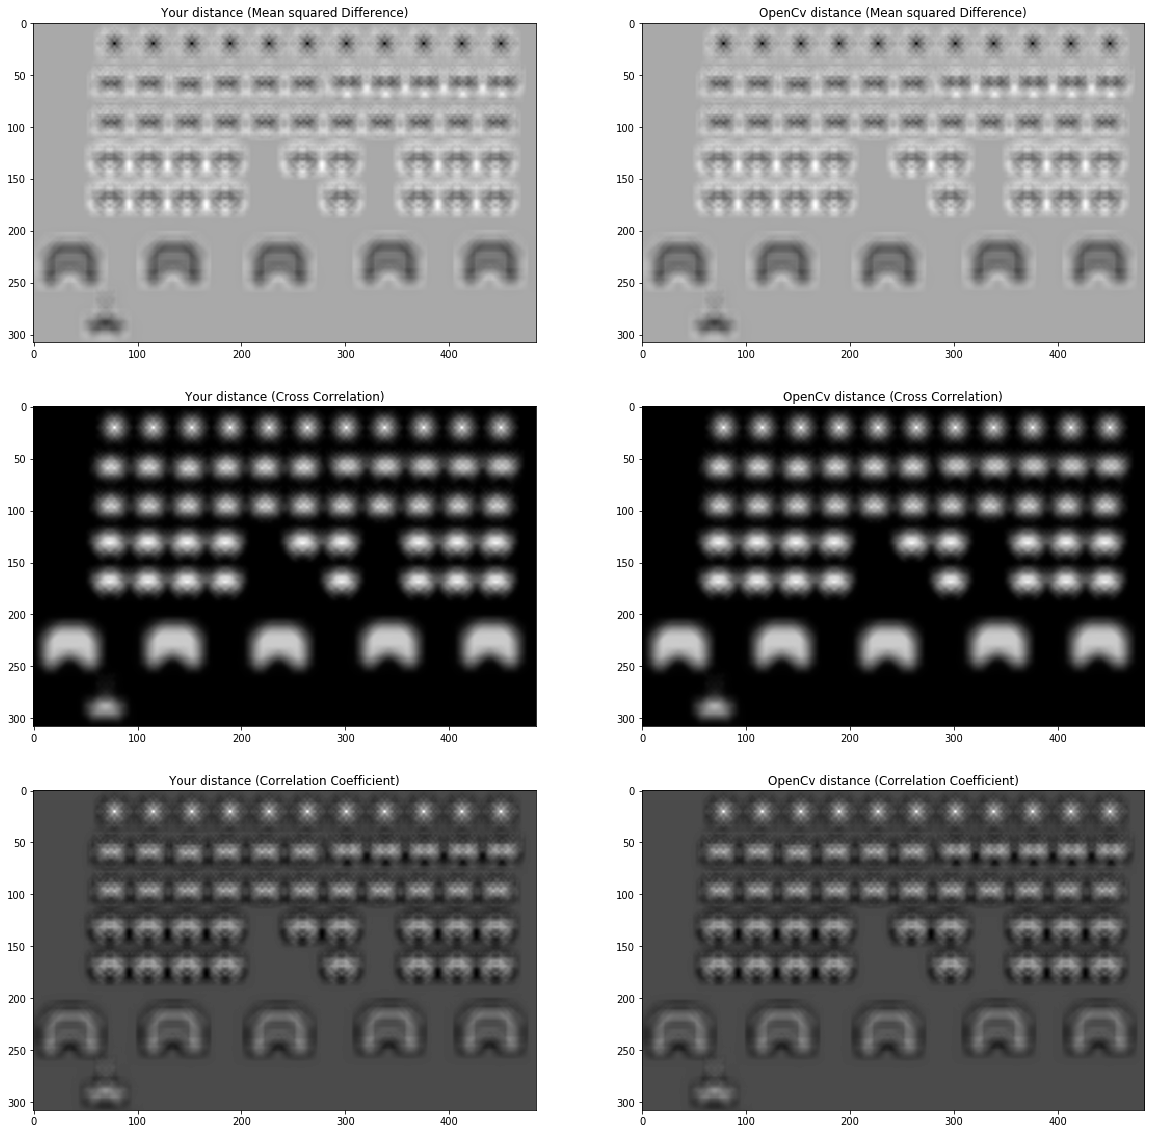

In [6]:
#Do the same for your other 3 functions
res1 = cv.matchTemplate(img_gray,template,cv.TM_SQDIFF) # Mean squared difference
res2 = cv.matchTemplate(img_gray,template,cv.TM_CCORR) # Cross Correlation
res3 = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF) # Correlation Coefficient

# Display two example maps
fig, ax = plt.subplots(3, 2, figsize=(20, 20),squeeze=False)

# Show image, add title
display_image(dist_map1, axes=ax[0][0])
ax[0][0].set_title("Your distance (Mean squared Difference)")

display_image(res1, axes=ax[0][1])
ax[0][1].set_title("OpenCv distance (Mean squared Difference)")

display_image(dist_map2, axes=ax[1][0])
ax[1][0].set_title("Your distance (Cross Correlation)")

display_image(res2, axes=ax[1][1])
ax[1][1].set_title("OpenCv distance (Cross Correlation)")

display_image(dist_map3, axes=ax[2][0])
ax[2][0].set_title("Your distance (Correlation Coefficient)")

display_image(res3, axes=ax[2][1])
ax[2][1].set_title("OpenCv distance (Correlation Coefficient)")


As you may have noticed, the self-implemented method is quite slow even for small images, since it increases quadratically for the input image and also the template image. OpenCV implements the same function optimally (low-level implementation).

### Finding the local minimums/maximums

As explained before, in order to find the location of our possible object we need to find the minimum or maximum point in our resulting distance map. OpenCV minMaxLoc():

https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#void%20minMaxLoc(InputArray%20src,%20double*%20minVal,%20double*%20maxVal,%20Point*%20minLoc,%20Point*%20maxLoc,%20InputArray%20mask) ,

can be used to find the local minimum and maximum of the single-channel array (1D or 2D). 

However, if we happen to have several objects in the image that we would like to match cv.minMaxLoc() won't give you all the locations. 

### Exercise 2.1.4 

Write your own function: 

`multiMinMax(src, flag, params)`,

which should take an input 2D image `src` and return an `output_array` with the local minimums or maximums depending on the provided `flag` (`flag = "min"` or `flag = "max"`), and a given `params`.

The `params` can be, for example, a _threshold_ for the local minima/maxima, the maximum number of maximums/minimums to return, a difference between the global maxima/minima to be included, etc.



(2, 11)


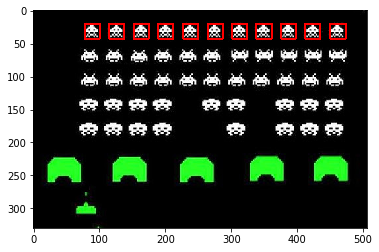

In [7]:
 ## Code here      

# Function skeleton
def multiMinMax(src,flag,params):
    
    output = []
    h = src.shape[0]
    w = src.shape[1]
    
    for y in range(0,w):
        for x in range(0,h):
            if flag == 'max':
                if src[x,y]>params:
                    output.append((x,y))
            if flag == 'min':
                if src[x,y]<params:
                    output.append((x,y))    
    output = np.transpose(output)                
    return output


# how to draw the ROIS
def drawROIS(src, template, locations, color = (0,0,255)):
    w, h = template.shape[::-1]
    
    img_holder = src.copy();

    for pt in zip(*locations[::-1]):
        cv.rectangle(img_holder, pt, (pt[0] + w, pt[1] + h), color, 2)
    
    return img_holder; 
    

# How should be called:
img_rgb  = cv.imread('../data/space-invaders_1.jpg')
img_gray = cv.imread('../data/space-invaders_1.jpg',0)
template = cv.imread('../data/template_0.png',0)

# For a given distance Map
distance_map_norm_corr = cv.matchTemplate(img_gray,template,cv.TM_CCORR_NORMED)

# Use your function here!
locations = multiMinMax(distance_map_norm_corr,'max',0.97)

# Draw the ROIs 
img_rgb_holder = drawROIS(img_rgb, template, locations)

# example:
display_image(img_rgb_holder)

# How many ROIS did you returned? 
print(np.array(locations).shape)

## Exercise 2.1.5: 

Now that you are all set up, use the functions above and *try* to detect ALL the matching objects in the input image (Using template Matching).

Rules:

* You can use any metric you want, self-implemented or from OpenCV. 
* You can tweak your multiMinMax to get better results.
* For 1) and 2) and 3) you have to do it in grayscale.
* 4) can use multi-channel heuristics.



### 1) Perfect match <3

Using the base input provided, plot the input image _showing_ the locations of the matching objects for the 2 provided templates.

Follow the code below and provide some insights like:

* Why did you choose that given metric?  
* How robust to false positives/negatives is your selected metric.
* Is the number of output locations the same as the matching objects? 


[]

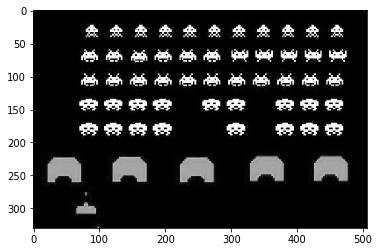

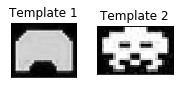

In [8]:
# input images to use
p1_src_rgb    = cv.imread('../data/space-invaders_1.jpg')
p1_src_gray   = cv.imread('../data/space-invaders_1.jpg',0)

# Show the matching of these 2 templates:
p1_template_1 = cv.imread('../data/template_1.png',0)
p1_template_2 = cv.imread('../data/template_2.png',0)

display_image(p1_src_gray)

fig, ax = plt.subplots(1, 2, figsize=(3, 1),squeeze=False)

display_image(p1_template_1, axes=ax[0][0])
ax[0][0].set_title("Template 1")
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

display_image(p1_template_2, axes=ax[0][1])
ax[0][1].set_title("Template 2")
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])


In [29]:
#Your code goes here:

# Modified 'multiMinMax' function
def multiMinMax(src,flag,params,limit):
    '''
    << INPUTS >>
    src : 2D image
    flag : 'max' or 'min'
    params : threshold for deciding the local maximum or local minimum
    limit : size of the template(Type : tuple) or the distance between distinct pixels.
    
    << OUTPUTS >>
    output : location of the pixel that corresponds to the local minimum or maximum
    '''
    
    output = []
    
    # Get the size of the 2D image
    h = src.shape[0]
    w = src.shape[1]
    
    for y in range(0,w):
        for x in range(0,h):
            
            # CASE 1 : The best matching position is located in the local maximums
            if flag == 'max':
                if src[x,y]>params:
                    distant = 1
                    # If the selected pixel is within the size of the src,
                    # set 'distant' flag to 0 
                    # so that it won't have the multiple count for the same object.
                    for selected in output:
                        if abs(selected[1]-y)<limit[1] and abs(selected[0]-x)<limit[0]:
                            distant = 0
                    if distant==1:        
                        output.append((x,y))
            
            # CASE 2 : The best matching position is located in the local minimums
            if flag == 'min':
                if src[x,y]<params:
                    distant = 1
                    # If the selected pixel is within the size of the src,
                    # set 'distant' flag to 0 
                    # so that it won't have the multiple count for the same object.
                    for selected in output:
                        if abs(selected[1]-y)<limit[1] and abs(selected[0]-x)<limit[0]:
                            distant = 0
                    if distant==1:        
                        output.append((x,y))  
    output = np.transpose(output)                  
    return output
    

5 objects are detected(red) that matches with template 1
17 objects are detected(green) that matches with template 2


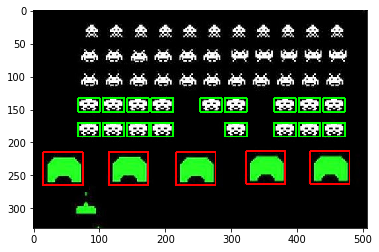

In [11]:
# For a given distance Map
distance_map_norm_corr1 = cv.matchTemplate(p1_src_gray,p1_template_1,cv.TM_CCORR_NORMED)
distance_map_norm_corr2 = cv.matchTemplate(p1_src_gray,p1_template_2,cv.TM_CCORR_NORMED)

# Use your function here!
locations1 = multiMinMax(distance_map_norm_corr1,'max',0.95, p1_template_1.shape)
locations2 = multiMinMax(distance_map_norm_corr2,'max',0.95, p1_template_2.shape)

# Draw the ROIs 
img_rgb_holder = drawROIS(p1_src_rgb, p1_template_1, locations1)
final_holder = drawROIS(img_rgb_holder, p1_template_2, locations2, (0,255,0))

# Display the detection
display_image(final_holder)

# How many ROIS did you returned? 
print( np.array(locations1).shape[1], 'objects are detected(red) that matches with template 1')
print( np.array(locations2).shape[1], 'objects are detected(green) that matches with template 2')

** Why did you choose that given metric?  **
- We choosed normalized cross correlation metrics to make thresholding easier since the output image values is in between 0 to 1 for normalized metrics. 
- By tweaking the parameters such as threshold(param), both normalized cross corrleation method and normalized correlation coefficient method work well for detecting the matching objects. 
    
    
** How robust to false positives/negatives is your selected metric.**
- To prevent multiple detection for the same object, we have implemented a feature in the ‘multiMinMax’ function that checks that whether each detection is far enough to each other.
- From the detection result, it is possible to say that normalized cross correlation method is robust to false positives/negatives. However, when using the normalized mean squared difference method, it detects many false positives from the source image. 
    
** Is the number of output locations the same as the matching objects? ** 
- By using normalized metrics, the number of ouput location is same as the matching objects. 


### 2) Not so perfect Match </3

Plot the input image _showing_ the locations of the matching objects and any false positive. All the _invaders_ in the same row counts as the "same" class. 

Follow the code bellow and provide some insights like:

* How did you select the number of maximums/minimus?  
* How robust to false positives/negatives is your selected metric.
* Is the number of output locations the same as the matching objects? 
* Could you use any of the features from the last chapter to improve the matching?


[]

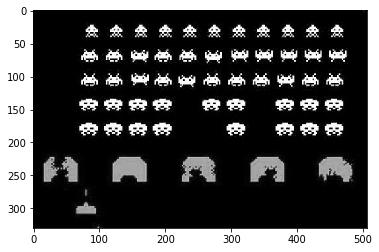

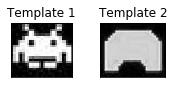

In [9]:
# input
p2_src_rgb    = cv.imread('../data/space-invaders_2.jpg')
p2_src_gray   = cv.imread('../data/space-invaders_2.jpg',0)

# 2 tempaltes (check that tempalte one don't match all the invaders in the same row) 
p2_template_1 = cv.imread('../data/template_3.png',0)
p2_template_2 = cv.imread('../data/template_1.png',0)

display_image(p2_src_gray)

fig, ax = plt.subplots(1, 2, figsize=(3, 1),squeeze=False)

display_image(p2_template_1, axes=ax[0][0])
ax[0][0].set_title("Template 1")
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

display_image(p2_template_2, axes=ax[0][1])
ax[0][1].set_title("Template 2")
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])


12 objects are detected(red) that matches with template 1
5 objects are detected(blue) that matches with template 2


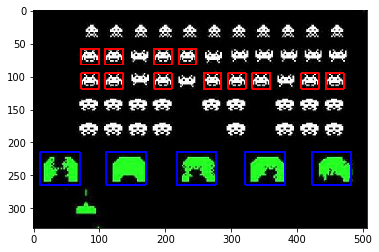

In [12]:
# Your code goes here:
# For a given distance Map
distance_map_norm_corr1 = cv.matchTemplate(p2_src_gray,p2_template_1,cv.TM_CCORR_NORMED)
distance_map_norm_corr2 = cv.matchTemplate(p2_src_gray,p2_template_2,cv.TM_CCORR_NORMED)

# Use your function here!
locations_1 = multiMinMax(distance_map_norm_corr1,'max',0.95, p2_template_1.shape)
locations_2 = multiMinMax(distance_map_norm_corr2,'max',0.85, p2_template_2.shape)

# Draw the ROIs 
p2_result = drawROIS(p2_src_rgb, p2_template_1,locations_1);
p2_result = drawROIS(p2_result, p2_template_2,locations_2,(255,0,0));

# Display the detection
display_image(p2_result)

# How many ROIS did you returned? 
print( np.array(locations_1).shape[1], 'objects are detected(red) that matches with template 1')
print( np.array(locations_2).shape[1], 'objects are detected(blue) that matches with template 2')

**How did you select the number of maximums/minimus?**
- We choose the lower threshold values than the previous exercise for the deformed object, for example template 2 to detect all the deformed object. If the threshold is set too high, the algorithm will only detect perfect images. On the other hand, if the threshold is set too low, the algorithm will detect false objects.
    
    
**How robust to false positives/negatives is your selected metric.**
- We used normalized cross correlation method to calculate the distance and to make the detection robust. Our method only detected the right object. Especially for the template 1, we only found the hands up aliens. When using the mean squared difference method, the differences between the hands up aliens and hands down aliens would not be big enough and thus, leading the false positives/negatives.  


**Is the number of output locations the same as the matching objects?**
- Yes it is. We found 5 green objects and 12 hands up aliens.

**Could you use any of the features from the last chapter to improve the matching?**
- We may use the histogram equalization to detect the value of the big object and then filter the object that has the same color. It could make detecting easier and robust allowing us to reduce the threshold more. 

### 3) Find Waldo.

Finding Waldo (or Wally for our Brittish friends) it's a series of children's puzzle books from back in the 80's. Something like finding Nemo, but harder. In this exercise, you will try to find Waldo using template matching. 

Using the given template (beautifully cut from the input source) use it to find Waldo. 
Plot the input image _showing_ the location of Waldo (if you find it) and any false positive negative. 

In this exercise, you may choose to use any transformation in the input image (like the scale it to save time) or tweak the distance metric. 

You can't modify the template (only scale it).

Follow the code below and provide some insights like:

* What metric seemed to work better this time? 
* Was it different from the previous exercise?
* Could you use any of the features from the last chapter to improve the matching?
* How could you reduce the false positives? 

Save the output in a separate image to visualize easier.


[]

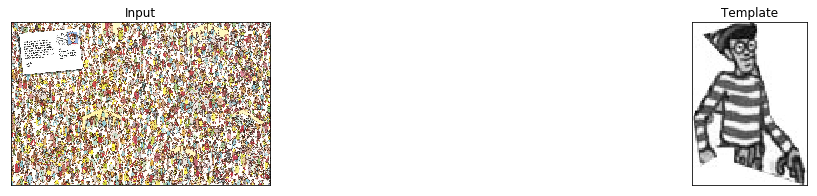

In [49]:
# inputs
p3_src_rgb  = cv.imread('../data/finding_waldo_1.jpg')
p3_src_gray = cv.imread('../data/finding_waldo_1.jpg',0)
p3_template = cv.imread('../data/waldo_template.jpg',0)

fig, ax = plt.subplots(1, 2, figsize=(20, 3),squeeze=False)

display_image(p3_src_rgb, axes=ax[0][0])
ax[0][0].set_title("Input")
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

display_image(p3_template, axes=ax[0][1])
ax[0][1].set_title("Template")
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

1


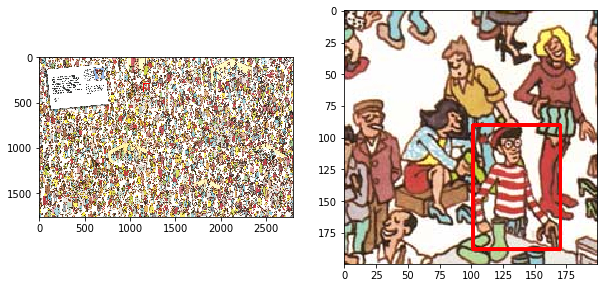

In [57]:
#your code goes here

# For a given distance Map
distance_map_norm_corr = cv.matchTemplate(p3_src_gray,p3_template,cv.TM_CCOEFF_NORMED)

# Use your function here!
p3_locations = multiMinMax(distance_map_norm_corr,'max',0.50,p3_template.shape)

# Draw the ROIs 
p3_result = drawROIS(p3_src_rgb, p3_template,p3_locations);

# Display the detection
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

display_image(p3_result, axes=ax[0])
display_image(p3_result, axes=ax[0])

display_image(p3_result)
display_image(p3_result[200:400,1050:1250])

# How many false positives did you get?
print(len(p3_locations[0]))

In [ ]:
def multiMinMax2(src,flag,params,limit, img, template):
    '''
    << INPUTS >>
    src : 2D image
    flag : 'max' or 'min'
    params : threshold for deciding the local maximum or local minimum
    limit : size of the template(Type : tuple) or the distance between distinct pixels.
    
    << OUTPUTS >>
    output : location of the pixel that corresponds to the local minimum or maximum
    '''
    
    output = []
    
    # Get the size of the 2D image
    h = src.shape[0]
    w = src.shape[1]
    
    
    # CASE 1 : The best matching position is located in the local maximums
    if flag == 'max':
        ind = np.unravel_index(np.argmin(src, axis=None), src.shape)
        while (thresh == 1):
            if(src(ind) > params):
                test_corr = cv.matchTemplate(img,template,cv.TM_CCORR_NORMED)
                if (test_corr== 1
        if src[x,y]>params:
            distant = 1
            # If the selected pixel is within the size of the src,
            # set 'distant' flag to 0 
            # so that it won't have the multiple count for the same object.
            for selected in output:
                if abs(selected[1]-y)<limit[1] and abs(selected[0]-x)<limit[0]:
                    distant = 0
            if distant==1:        
                output.append((x,y))
            
    # CASE 2 : The best matching position is located in the local minimums
    if flag == 'min':
        if src[x,y]<params:
            distant = 1
            # If the selected pixel is within the size of the src,
            # set 'distant' flag to 0 
            # so that it won't have the multiple count for the same object.
            for selected in output:
                if abs(selected[1]-y)<limit[1] and abs(selected[0]-x)<limit[0]:
                    distant = 0
            if distant==1:        
                output.append((x,y))  
    output = np.transpose(output)                  
    return output

In [95]:
test_corr = cv.matchTemplate(p3_src_gray,p3_template,cv.TM_CCORR_NORMED)
test_coeff = cv.matchTemplate(p3_src_gray,p3_template,cv.TM_CCOEFF_NORMED)
ans = p3_locations
print(p3_locations)
print(test_corr)
#print(test_coeff)

ind = np.unravel_index(np.argmax(test_corr, axis=None), test_corr.shape)
ind2 = np.unravel_index(np.argmax(test_coeff, axis=None), test_coeff.shape)
ind3 = np.unravel_index(np.argmin(test_coeff, axis=None), test_coeff.shape)

print(ind)
print(ind2)
print(test_coeff[ind2])
print(test_corr[ind])
print(test_corr[ind2])

t = test_corr - test_corr[ind2]


[[ 290]
 [1151]]
[[0.87940395 0.87878346 0.87771416 ... 0.87966776 0.8827848  0.8859136 ]
 [0.8791582  0.8784634  0.87762004 ... 0.8775486  0.880076   0.8831344 ]
 [0.87967473 0.87873065 0.8782238  ... 0.87695116 0.87876767 0.8815959 ]
 ...
 [0.909587   0.90815693 0.90687096 ... 0.82425874 0.8238551  0.8241397 ]
 [0.9107011  0.9090478  0.90756536 ... 0.8245233  0.8244826  0.8247099 ]
 [0.91163725 0.9098384  0.90813977 ... 0.82482725 0.82506037 0.82520497]]
(106, 424)
(290, 1151)
0.5139801
0.93671024
0.9232689


31

680


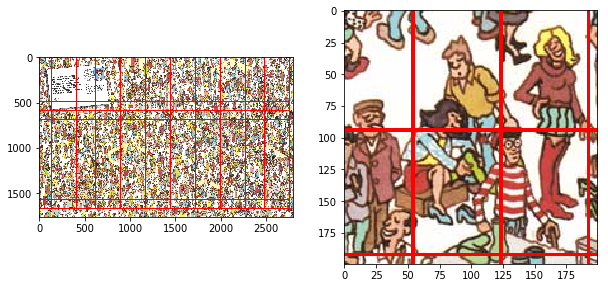

In [52]:
# For a given distance Map
distance_map_norm_corr = cv.matchTemplate(p3_src_gray,p3_template,cv.TM_CCORR_NORMED)

# Use your function here!
p3_locations = multiMinMax(distance_map_norm_corr,'max',0.80,p3_template.shape)

# Draw the ROIs 
p3_result = drawROIS(p3_src_rgb, p3_template,p3_locations);

# Display the detection
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

display_image(p3_result, axes=ax[0])
display_image(p3_result, axes=ax[0])

display_image(p3_result)
display_image(p3_result[200:400,1050:1250])

# How many false positives did you get?
print(len(p3_locations[0]))

**What metric seemed to work better this time?**
- Normalized correlation coefficient method works better and faster than the other metrics.  
- WHY??? (since we have exactly the same template that matches from the original image.) 


**Was it different from the previous exercise?**
- Thresholding values were different from the previous exercises but other part of the algorithm stayed the same.


**Could you use any of the features from the last chapter to improve the matching?**


**How could you reduce the false positives?**


In [ ]:
## Save the output image to make it easier to visualize!!. Submit this with the notebook

cv.imwrite('../../p3_res.png',p3_result)

### 4) Find Waldo 2.0.

As you can see, using template matching can be tricky, even when you have a _good_ template. As for the last exercise, you will try to design a good __template__  (it can be done in Paint if you want =P) in order to find Waldo in three different images. In this exercise, you can (if you want) use the information of the 3 RGB channels (to generate a 1 _better_ 1 channel image for example) and transform the input image (for example to homogenize the scale!).

Plot your selected template and the input image _showing_ the location of each Waldo (if you find it) and any false positive.

Follow the code below and provide some insights like:

* Was it different from the previous exercise?
* Could you perform better if you could use more than 1 template to find Waldo? 

In [ ]:
src_images = ["../data/waldo_1.jpg","../data/waldo_2.jpg","../data/waldo_3.jpg"]
loc_images = ["../data/location_1.png","../data/location_2.png","../data/location_3.png"]

src_color = []
src_gray  = []

locations = []
for img in src_images:
    src_color.append(cv.imread(img))
    src_gray.append(cv.imread(img,0))
    
for loc in loc_images:
    locations.append(cv.imread(loc))

    
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for i in range(3):
      
    # Show image, add title + remove tick
    display_image(src_color[i], axes=ax[i][0])
    ax[i][0].set_title("Waldo %d"%i)
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    
    display_image(locations[i], axes=ax[i][1])
    ax[i][1].set_title("Location %d"%i)
    ax[i][1].set_xticks([])
    ax[i][1].set_yticks([])
    

## Your code goes here.
